# Importing Libraries
***
### Analyst: Jerwin Nico H. Quijano

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets//chicago_2001_present.csv', low_memory=False)

In [28]:
data.head(50)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Latitude,Longitude,Location,Month,Day,DayOfWeek,HourOfDay,MinuteOfDay,community_name,ward_rep
0,13311263,JG503434,2022-07-29 03:39:00,023XX S TROY ST,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,True,False,...,41.842530,-87.671292,"(41.976290414, -87.905227221)",7,29,4,3,39,South Lawndale,Byron Sigcho Lopez
1,13053066,JG103252,2023-01-03 16:44:00,039XX W WASHINGTON BLVD,2017,NARCOTICS,MANUFACTURE / DELIVER - CRACK,SIDEWALK,True,False,...,41.842530,-87.671292,"(41.976290414, -87.905227221)",1,3,1,16,44,West Garfield Park,Jason C. Ervin
2,12131221,JD327000,2020-08-10 09:45:00,015XX N DAMEN AVE,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,True,False,...,41.908418,-87.677407,"(41.908417822, -87.67740693)",8,10,0,9,45,West Town,Daniel La Spata
3,11227634,JB147599,2017-08-26 10:00:00,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,41.842530,-87.671292,"(41.976290414, -87.905227221)",8,26,5,10,0,Loop,Brendan Reilly
4,13203321,JG415333,2023-09-06 17:00:00,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,41.886018,-87.633938,"(41.886018055, -87.633937881)",9,6,2,17,0,Loop,Brendan Reilly
5,13204489,JG416325,2023-09-06 11:00:00,0000X E 8TH ST,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,41.871835,-87.626151,"(41.871834768, -87.62615082)",9,6,2,11,0,Loop,Lamont J. Robinson
6,11695116,JC272771,2019-05-21 08:20:00,018XX S CALIFORNIA AVE,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,41.856547,-87.695605,"(41.856547057, -87.695604526)",5,21,1,8,20,North Lawndale,Byron Sigcho Lopez
7,12419690,JE295655,2021-07-07 10:30:00,132XX S GREENWOOD AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,RESIDENCE,False,False,...,41.655116,-87.594883,"(41.65511579, -87.594883198)",7,7,2,10,30,Riverdale,Peter Chico
8,12729745,JF279458,2022-06-14 14:47:00,035XX N CENTRAL AVE,0340,ROBBERY,ATTEMPT STRONG ARM - NO WEAPON,BANK,True,False,...,41.945232,-87.766735,"(41.945232412, -87.766734668)",6,14,1,14,47,Portage Park,Ruth Cruz
9,12835559,JF406130,2022-09-21 22:00:00,004XX E 69TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER (SPECIFY),True,False,...,41.769347,-87.615008,"(41.769346711, -87.615008288)",9,21,2,22,0,Greater Grand Crossing,William E. Hall


In [29]:
data['Date'] = data['Date'].astype('str')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors = 'coerce')

In [30]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['HourOfDay'] = data['Date'].dt.hour
data['MinuteOfDay'] = data["Date"].dt.minute

In [6]:
data.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
HourOfDay                

# Cleaning Data add Adding appropriate values
___

In [7]:
data['Location Description'] = data['Location Description'].fillna('unaccounted')
data['District'] = data['District'].fillna(data['District'].mean())
data['Ward'] = data['Ward'].fillna(-1) # -1 represent as unknown ward
data['Community Area'] = data['Community Area'].fillna(-1) # -1 represent as unknown community area
data['X Coordinate'] = data['X Coordinate'].fillna(data['X Coordinate'].mean())
data['Y Coordinate'] = data['Y Coordinate'].fillna(data['Y Coordinate'].mean())
data['Latitude'] = data['Latitude'].fillna(data['Latitude'].mean())
data['Longitude'] = data['Longitude'].fillna(data['Longitude'].mean())
data['Location'] = data['Location'].fillna(data['Location'].mode()[0])

In [8]:
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
HourOfDay               0
MinuteOfDay             0
dtype: int64

### Adding Community Name
***

In [9]:
community_map = {
    1: "Rogers Park",
    2: "West Ridge",
    3: "Uptown",
    4: "Lincoln Square",
    5: "North Center",
    6: "Lake View",
    7: "Lincoln Park",
    8: "Near North Side",
    9: "Edison Park",
    10: "Norwood Park",
    11: "Jefferson Park",
    12: "Forest Glen",
    13: "North Park",
    14: "Albany Park",
    15: "Portage Park",
    16: "Irving Park",
    17: "Dunning",
    18: "Montclare",
    19: "Belmont Cragin",
    20: "Hermosa",
    21: "Avondale",
    22: "Logan Square",
    23: "Humboldt Park",
    24: "West Town",
    25: "Austin",
    26: "West Garfield Park",
    27: "East Garfield Park",
    28: "Near West Side",
    29: "North Lawndale",
    30: "South Lawndale",
    31: "Lower West Side",
    32: "Loop",
    33: "Near South Side",
    34: "Armour Square",
    35: "Douglas",
    36: "Oakland",
    37: "Fuller Park",
    38: "Grand Boulevard",
    39: "Kenwood",
    40: "Washington Park",
    41: "Hyde Park",
    42: "Woodlawn",
    43: "South Shore",
    44: "Chatham",
    45: "Avalon Park",
    46: "South Chicago",
    47: "Burnside",
    48: "Calumet Heights",
    49: "Roseland",
    50: "Pullman",
    51: "South Deering",
    52: "East Side",
    53: "West Pullman",
    54: "Riverdale",
    55: "Hegewisch",
    56: "Garfield Ridge",
    57: "Archer Heights",
    58: "Brighton Park",
    59: "McKinley Park",
    60: "Bridgeport",
    61: "New City",
    62: "West Elsdon",
    63: "Gage Park",
    64: "Clearing",
    65: "West Lawn",
    66: "Chicago Lawn",
    67: "West Englewood",
    68: "Englewood",
    69: "Greater Grand Crossing",
    70: "Ashburn",
    71: "Auburn Gresham",
    72: "Beverly",
    73: "Washington Heights",
    74: "Mount Greenwood",
    75: "Morgan Park",
    76: "O'Hare",
    77: "Edgewater",
    -1: "Unknown"
}

data['community_name'] = data['Community Area'].map(community_map)

### Adding Ward Names
***

In [10]:
ward_names = {
    1: "Daniel La Spata",
    2: "Brian Hopkins",
    3: "Pat Dowell",
    4: "Lamont J. Robinson",
    5: "Desmon C. Yancy",
    6: "William E. Hall",
    7: "Gregory Mitchell",
    8: "Michelle Harris",
    9: "Anthony Beale",
    10: "Peter Chico",
    11: "Nicole T. Lee",
    12: "Julia M. Ramirez",
    13: "Marty Quinn",
    14: "Jeylu B. Gutierrez",
    15: "Raymond Lopez",
    16: "Stephanie D. Coleman",
    17: "David Moore",
    18: "Derrick G. Curtis",
    19: "Matthew J. O’Shea",
    20: "Jeanette B. Taylor",
    21: "Ronnie L. Mosley",
    22: "Michael D. Rodriguez",
    23: "Silvana Tabares",
    24: "Monique L. Scott",
    25: "Byron Sigcho Lopez",
    26: "Jessica Fuentes",
    27: "Walter Redmond Burnett",
    28: "Jason C. Ervin",
    29: "Chris Taliaferro",
    30: "Ruth Cruz",
    31: "Felix Cardona, Jr.",
    32: "Scott Waguespack",
    33: "Rossana Rodriguez Sanchez",
    34: "William Conway",
    35: "Anthony Quezada",
    36: "Gilbert Villegas",
    37: "Emma Mitts",
    38: "Nicholas Sposato",
    39: "Samantha Nugent",
    40: "Andre Vasquez, Jr.",
    41: "Anthony Napolitano",
    42: "Brendan Reilly",
    43: "Timmy Knudsen",
    44: "Bennett R. Lawson",
    45: "James M. Gardiner",
    46: "Angela Clay",
    47: "Matthew J. Martin",
    48: "Leni Manaa-Hoppenworth",
    49: "Maria E. Hadden",
    50: "Debra Silverstein",
    -1: "Unknown"
}

data['ward_rep'] = data['Ward'].map(ward_names)

# Descriptive analysis
***
1. Which ward during their term has recorded the highest overall crime in Grand Boulevard?
2. Which District Area has the most recorded crime?
3. What Type of Crime often commit in the community area with most Poverty ('Riverdale')?
4. What is the Top 5 safest Neigborhood to live in Chichago with least Crime committed?
5. What Type of crime is commited in the saftes neighborhood in Chichago?
6. What is the hotspot of Theft in the safest neighborhood in chicago
7. Are sex-related crimes increasing again in recent years after a decade of decline?
8. Is there a strong relationship between time (year) and the decline of sex-related crimes in Chicago?
9. What crime has the highest arrest rate?
10. What time and Day of the Week does theft Do their crime?

# Grand Boulevard Analysis
***
<img src='https://upload.wikimedia.org/wikipedia/commons/2/20/20070511_Harold_Washington_Cultual_Center.JPG'>

In [57]:
gb_df = data[data['community_name'] == 'Grand Boulevard']

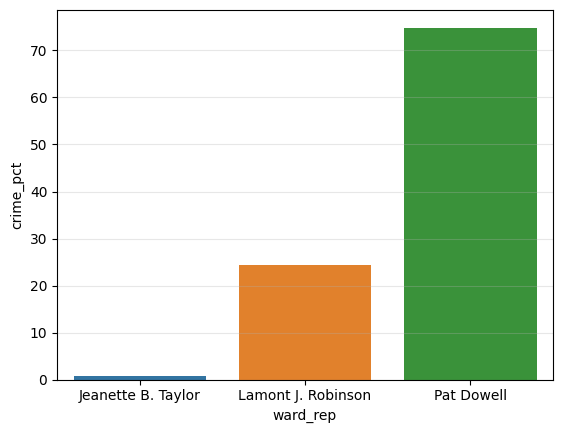

In [58]:
most_crime = gb_df.groupby(['ward_rep']).size().reset_index(name='crime')
most_crime['crime_pct'] = (most_crime['crime'] / most_crime['crime'].sum()) * 100 # display by percentage
plt.grid(axis='y', alpha=0.3)
sns.barplot(data = most_crime, x = 'ward_rep', y = 'crime_pct', hue = 'ward_rep')
plt.show()

## Insight
***
So looking the data represented by percent, it is clear that the crime is heavily concentrated in one area which is Pat Dowel Ward for over most atleast 70%  of all reported crime acroos three wards shown, Lamont J. Robinson on the other hand makes about a quarter of What Pat Dowell in total, while Jeanette B. Taylor ward contributes to almost nothing with a least of 1%. This jus suggest that Pat Dowells Ward should be the priority cause that where all the i think majority problems lies. 

In [59]:
area_no_uknown = data[data['community_name'] != 'Unknown']

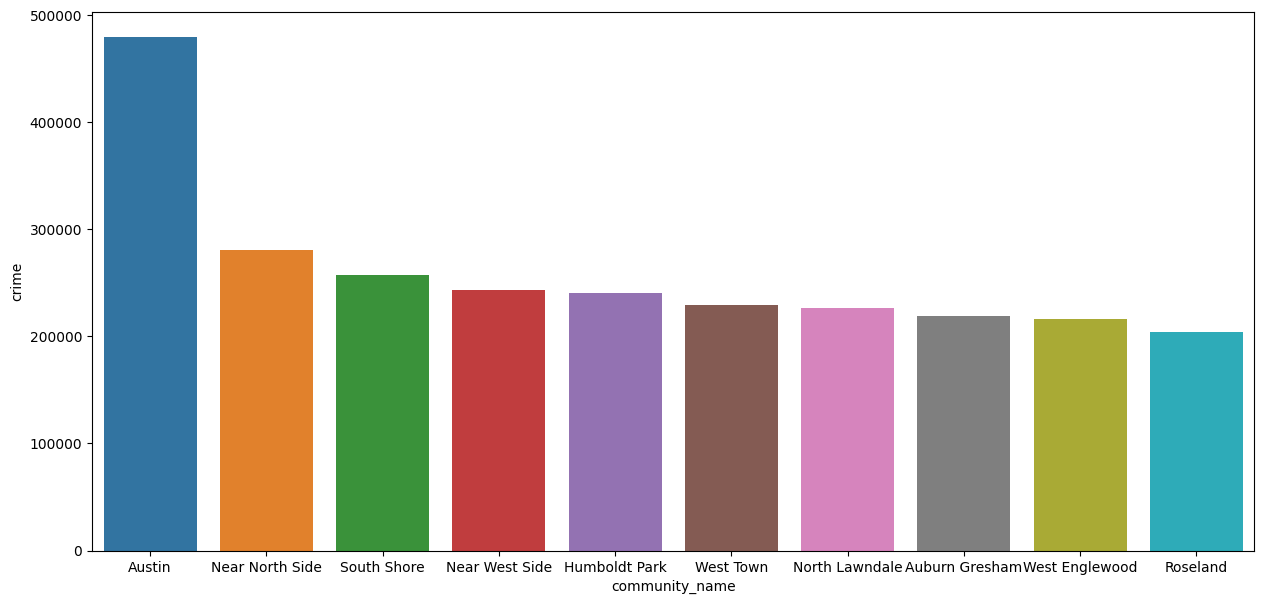

In [60]:
areas_with_high_crime = area_no_uknown.groupby('community_name').size().reset_index(name='crime').nlargest(10, 'crime')
areas_with_high_crime
sns.barplot(data = areas_with_high_crime, x = 'community_name', y = 'crime', hue = 'community_name')
plt.gcf().set_size_inches(15,7)
plt.show()

## Insight
***
Austin is overwhelmingly the community with the highest recorded number of crime incidents among the top ten, nearing 500,000 and standing as a significant outlier when compared to the others, which suggests that this area is the single most problematic region in terms of raw crime volume in the dataset. The next group of communities, including Near North Side, South Shore, and others down to North Lawndale, form a second tier with substantially lower yet high crime counts, mostly concentrated between approximately 225,000 and 300,000 incidents. The final three communities in the top ten—Auburn Gresham, West Englewood, and Roseland—all register counts just above 200,000, demonstrating that while the total crime counts are high across the list, there is a pronounced and notable difference between the top-ranked area and the rest of the high-crime communities.

## River Dale Chichago Poverty Community
<img src ='https://media.istockphoto.com/id/185325242/photo/small-midwest-town-riverdale-chicago.jpg?s=1024x1024&w=is&k=20&c=D3Wl60yt1G5jnr115Z-EaJ2f0xwi7_7X3aDJL3rkeno='>

In [61]:
riverdale_df = data[data['community_name'] == 'Riverdale']

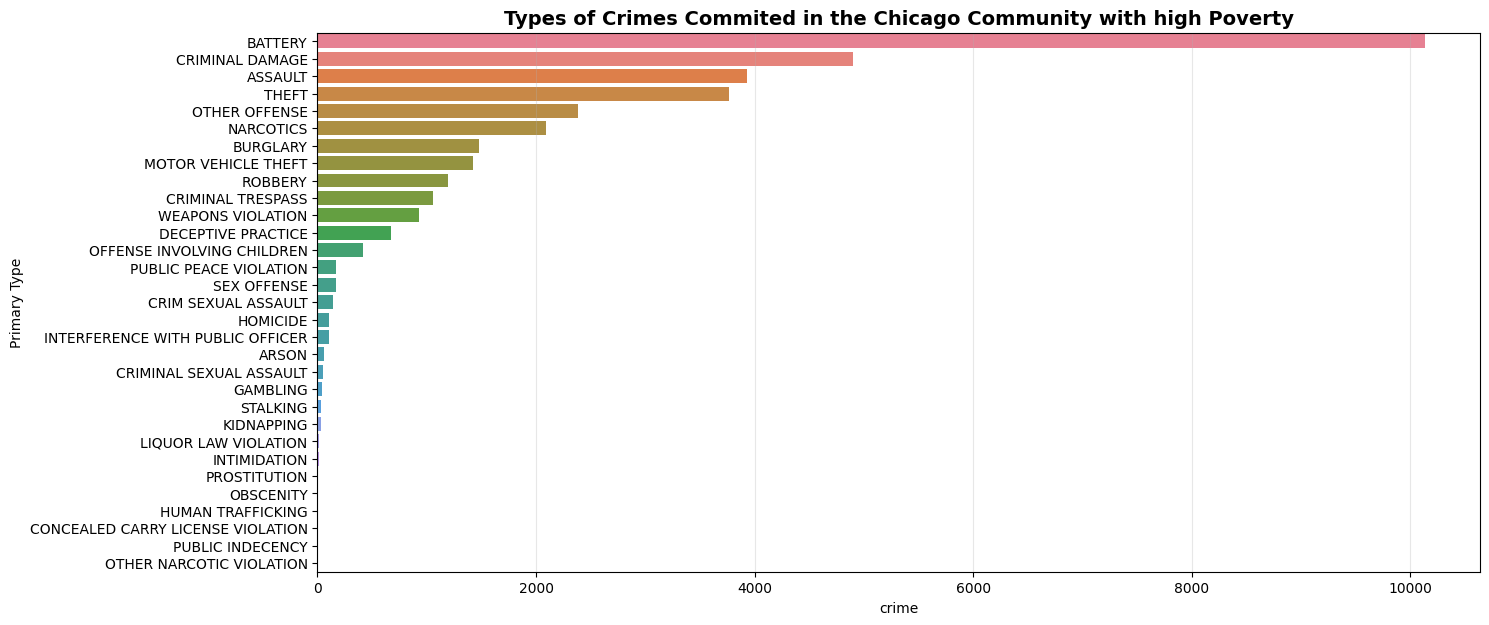

In [62]:
riverdale_crime_type = riverdale_df['Primary Type'].value_counts().reset_index(name="crime")
riverdale_crime_type
sns.barplot(data = riverdale_crime_type, y = 'Primary Type', x = 'crime', orient = 'h', hue = 'Primary Type')
plt.title("Types of Crimes Commited in the Chicago Community with high Poverty", fontsize=14, weight="bold")
plt.gcf().set_size_inches(15,7)
plt.grid(axis='x', alpha=0.3)
plt.show()

## Insight
***
If you look at the chart, Riverdale’s crime problem is mostly about people hurting people. Battery is crazy high compared to everything else — meaning fights, violence, and physical attacks are the everyday issue there. Right after that, you see a lot of Criminal Damage (like breaking stuff, vandalism) and Assault. Theft and drug cases also show up a lot, which makes sense since money is tight and people sometimes turn to quick cash or drugs.

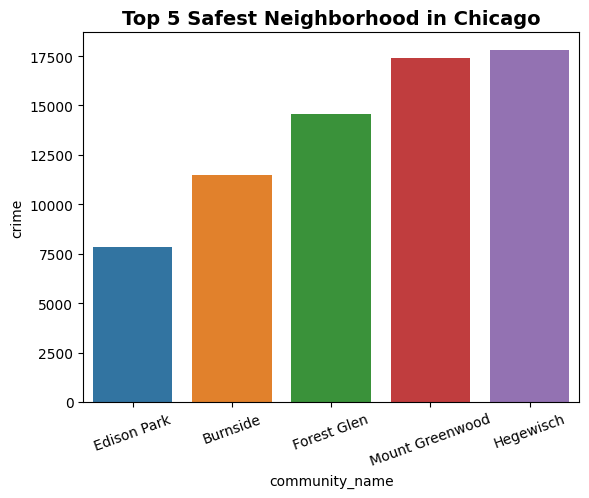

In [63]:
top_5_safest = data.groupby('community_name').size().reset_index(name = 'crime').nsmallest(5, 'crime')
plt.title("Top 5 Safest Neighborhood in Chicago", fontsize=14, weight="bold")
sns.barplot(data = top_5_safest, x = 'community_name', y = 'crime', hue = 'community_name')
plt.xticks(rotation = 20)
plt.show()

## Insight
***
If you’re looking for a safe neighborhood in Chicago, the data says: Edison Park is the safest place to live — way fewer crimes than anywhere else. After that, Burnside, Forest Glen, Mount Greenwood, and Hegewisch follow, but they still have more cases than Edison Park. Basically, if safety is your main concern, these five neighborhoods are your best bets, with Edison Park being the clear winner.

In [64]:
edison_df = data[data['community_name'] == 'Edison Park']

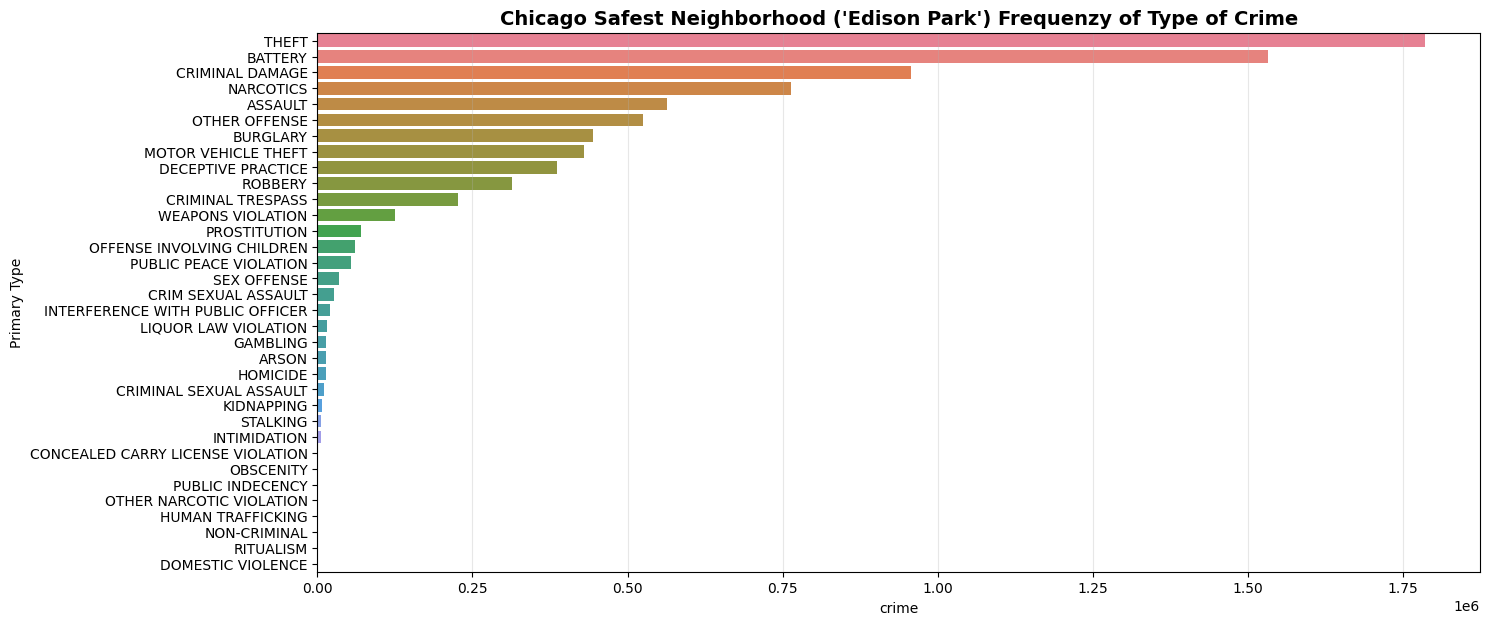

In [65]:
edison_crimes = data['Primary Type'].value_counts().reset_index(name='crime')
sns.barplot(data = edison_crimes, y = 'Primary Type', x = 'crime', orient = 'h', hue = 'Primary Type')
plt.gcf().set_size_inches(15,7)
plt.title("Chicago Safest Neighborhood ('Edison Park') Frequenzy of Type of Crime", fontsize=14, weight="bold")
plt.grid(axis='x', alpha=0.3)
plt.show()

## Insight
***
I was suprise that the most safest neighborhood still has crime. Theft is the number one leading crime committed, So while Edisone park doesn't have crazy levels of violence like in riverdale, people here still deal with their stuff getting stolen or property getting damage. So basically, the danger here is not about getting kicked in the ass but more on the side of keeping your property and belongings safe.

In [66]:
theft_df = edison_df[edison_df['Primary Type'] == 'THEFT']

edisone_locations = list(zip(theft_df['Latitude'], theft_df['Longitude']))

edisonMap = folium.Map(locations = [theft_df['Latitude'].mean(), theft_df['Longitude'].mean()], zoom_start=10)
HeatMap(edisone_locations).add_to(edisonMap)
edisonMap.save('edison_park_map.html')
edisonMap

## Insight
***
Looking at the heatmap, it’s clear that theft usually goes down on the streets, especially around North Olmstead Ave and North Avondale Ave. That kinda hints these aren’t house break-ins but more like street robberies or quick grabs where there’s traffic and people around. Basically, the action isn’t happening inside homes — it’s out in the open.

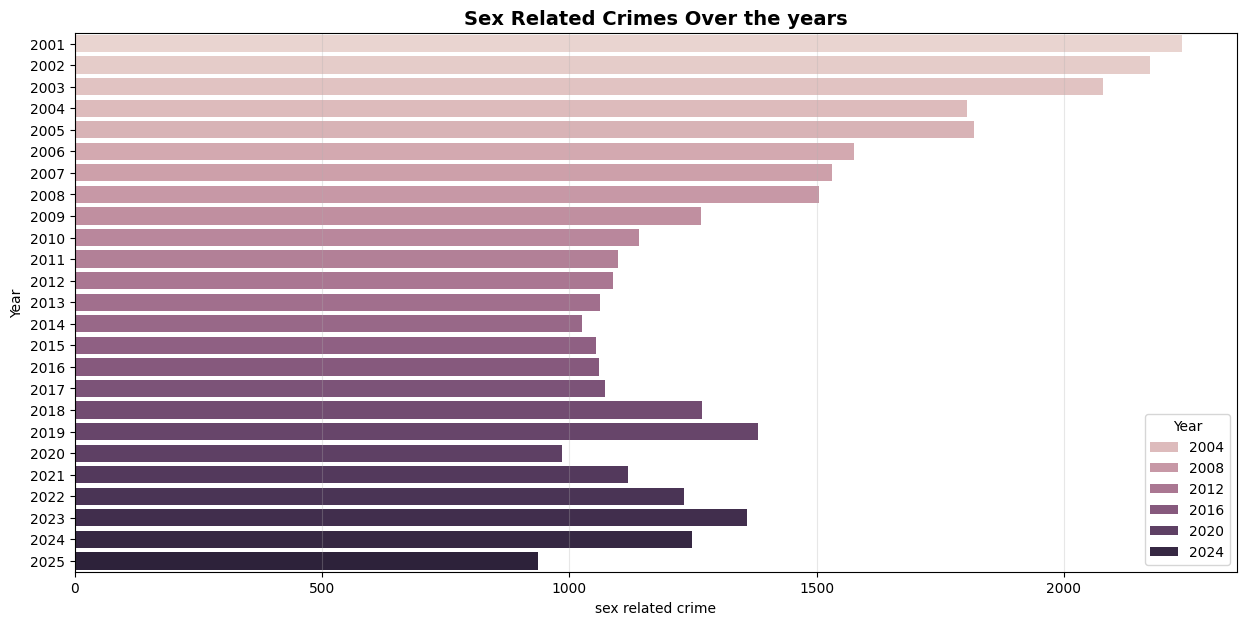

In [67]:
sex_offense_df = data[data['Primary Type'] == 'SEX OFFENSE']
sex_crime_years = sex_offense_df.groupby(['Year']).size().reset_index(name='sex related crime')
sns.barplot(data = sex_crime_years, y = 'Year', x = 'sex related crime', orient = 'h', hue = 'Year')
plt.gcf().set_size_inches(15,7)
plt.title("Sex Related Crimes Over the years", fontsize=14, weight="bold")
plt.grid(axis='x', alpha=0.3)
plt.show()

## Insight
***
Sex-related crimes were way higher back in the early 2000s (2000–2003), then they dropped pretty steadily through the 2010s. Around 2018, though, the numbers started climbing back up, with 2019 and 2023 being the highest spikes in recent years. 2020 looks super low, but that’s likely because of COVID lockdowns — less movement and maybe less reporting. The big picture? We’ve made progress since the early 2000s, but these crimes are creeping up again lately, so it’s still a serious issue.

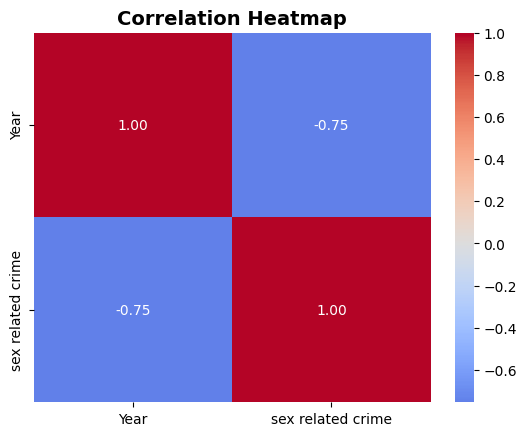

In [68]:
sex_crime_years = sex_offense_df.groupby(['Year']).size().reset_index(name='sex related crime')
correlation_matrix = sex_crime_years.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14, weight="bold")
plt.show()

## Insight
***
So the correlation Map of sex related crimes and year, says that Sex related crimes chicago have strongly decreased as the years goes by. So basically no relation, what i understand that as they not relate as the years goes by..

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8410198 entries, 0 to 8410197
Data columns (total 29 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int32         
 18  Updated On            object        
 19  

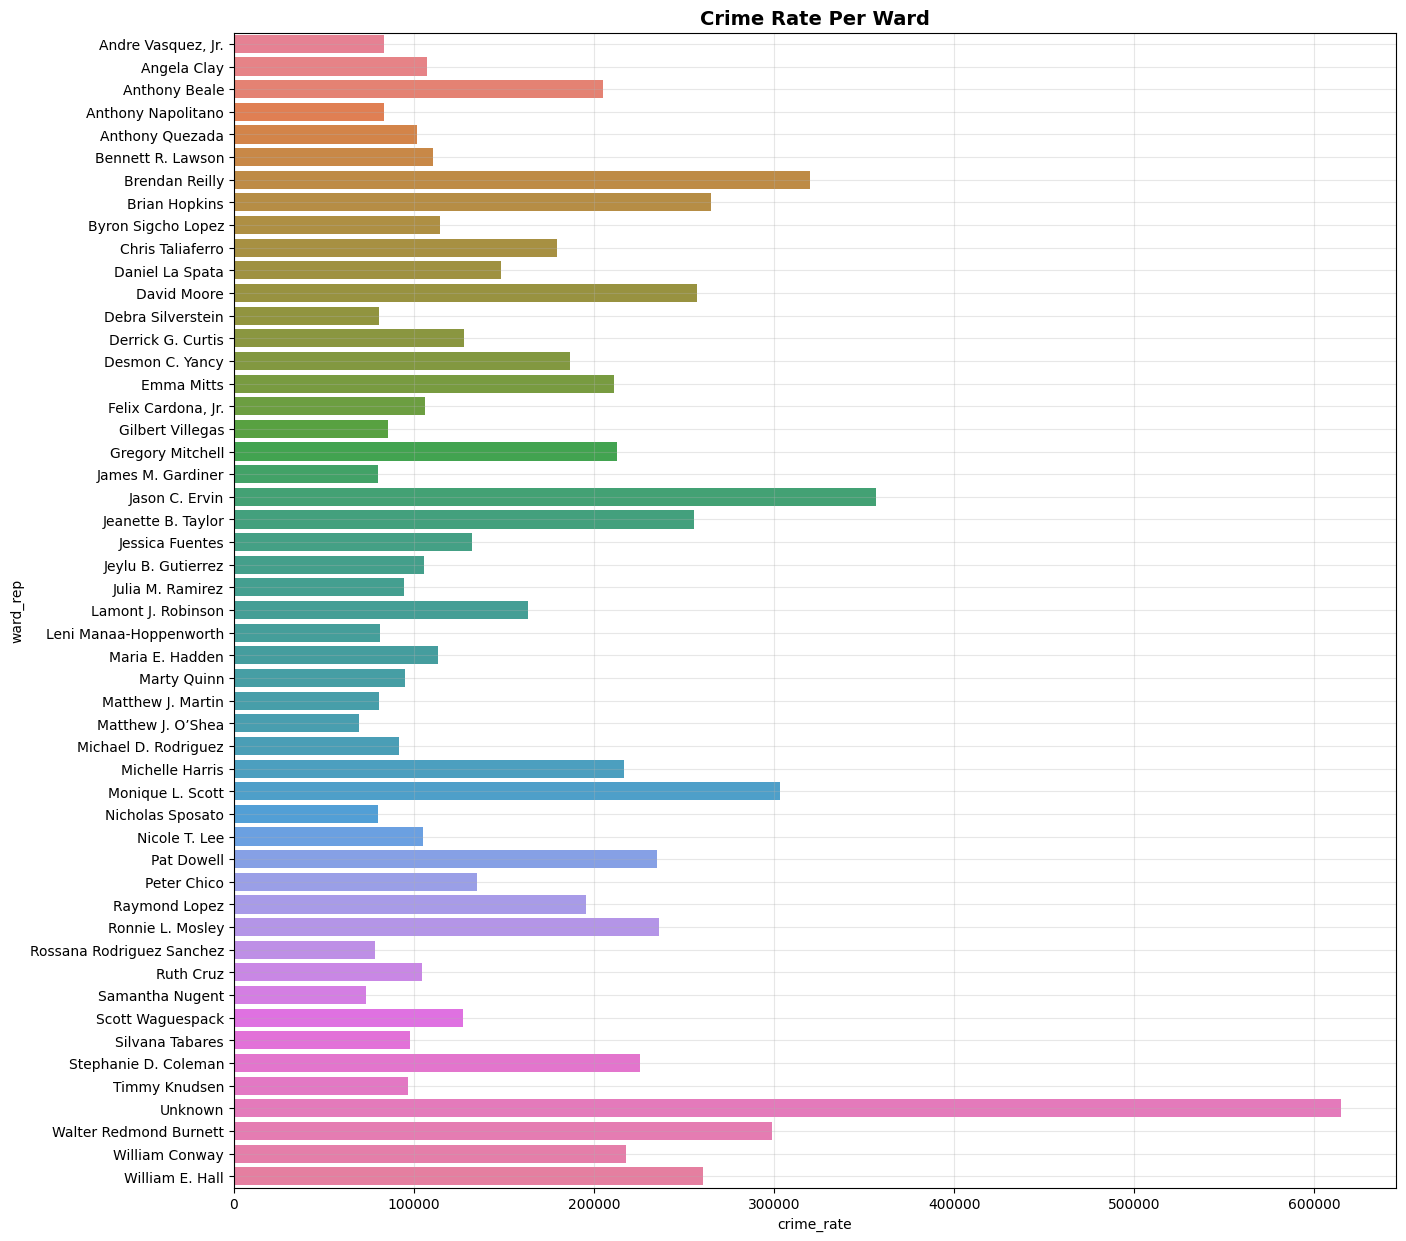

In [70]:
crime_per_ward = data.groupby('ward_rep').size().reset_index(name = 'crime_rate')
sns.barplot(data = crime_per_ward, y = 'ward_rep', x = 'crime_rate', orient = 'h', hue = 'ward_rep')
plt.gcf().set_size_inches(15,15)
plt.title("Crime Rate Per Ward", fontsize=14, weight="bold")
plt.grid(alpha=0.3)
plt.show()

## Insight
***
Not all wards are equal — some record much higher crime rates than others. This doesn’t just reflect population size or environment, but could also be tied to how well each ward is managed. Factors like how community resources are allocated, how effectively public safety is enforced, and how well local programs are run can all influence crime levels. In short, governance and leadership play a role in whether a ward feels safer or more at risk.

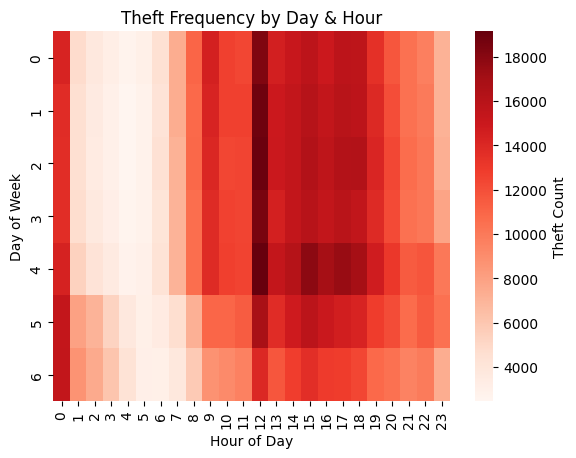

In [71]:
theft_df = data[data['Primary Type'] == 'THEFT']
hour_df = theft_df.groupby(['DayOfWeek', 'HourOfDay']).size()
hour_df = hour_df.unstack(level=0)
sns.heatmap(hour_df.T, cmap="Reds", annot=False, cbar_kws={'label':'Theft Count'})
plt.title("Theft Frequency by Day & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

## Insight
***
Basically, the data shows that most thefts happen during normal business hours—think late morning to late afternoon (around 10 AM to 5 PM)—and it's a lot worse Monday through Friday. If you're looking for the safest time, it's definitely overnight or all day on Sunday, where the number of thefts drops significantly.

In [72]:
data['HourOfDay'].unique()

array([ 3, 16,  9, 10, 17, 11,  8, 14, 22, 13,  0,  4, 18, 21,  1, 20, 12,
       15, 19,  6,  7,  2, 23,  5], dtype=int32)

In [27]:
data['Primary Type'].value_counts()

Primary Type
THEFT                                1785150
BATTERY                              1532491
CRIMINAL DAMAGE                       956346
NARCOTICS                             763342
ASSAULT                               563123
OTHER OFFENSE                         524325
BURGLARY                              444757
MOTOR VEHICLE THEFT                   429681
DECEPTIVE PRACTICE                    387055
ROBBERY                               314286
CRIMINAL TRESPASS                     226310
WEAPONS VIOLATION                     124642
PROSTITUTION                           70405
OFFENSE INVOLVING CHILDREN             60359
PUBLIC PEACE VIOLATION                 54729
SEX OFFENSE                            34126
CRIM SEXUAL ASSAULT                    27290
INTERFERENCE WITH PUBLIC OFFICER       20176
LIQUOR LAW VIOLATION                   15377
GAMBLING                               14663
ARSON                                  14396
HOMICIDE                               139